In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn import cluster, datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [5]:
d = datasets.load_wine()
d.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
d.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
d.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
d.data.shape

(178, 13)

In [9]:
xs = scale(d.data)
xs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# k = 3でK平均法を実行: 10種類の初期値を試す
km = cluster.KMeans(n_clusters=3, n_init=10)

In [11]:
km.fit(xs)


KMeans(n_clusters=3)

In [12]:
cl = km.labels_

In [13]:
# データを主成分分析により、2次元に射影し、品種による分類とk平均法による分類でそれぞれをプロットする
pc = PCA(n_components=2)
pc.fit(xs)
pxs = pc.transform(xs) # 主成分スコア

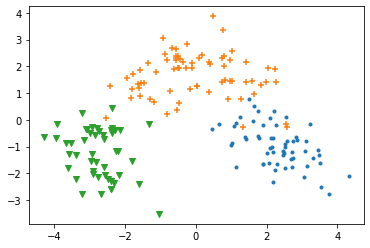

In [14]:
# 品種による分類でプロット
mk = ['.', '+', 'v']
for i in np.arange(3):
    idx = (d.target == i)
    plt.scatter(pxs[idx, 0], pxs[idx, 1], marker = mk[i])
plt.show();

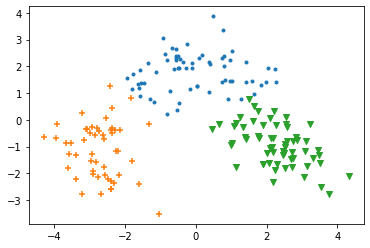

In [15]:
# k平均法による分類をプロット
for i in np.arange(3):
    idx = (cl == i)
    plt.scatter(pxs[idx, 0], pxs[idx, 1], marker = mk[i])
plt.show();

In [16]:
# このデータでは、化学的分析の結果は品種の違いをよく反映していると言える

In [17]:
d = datasets.load_iris()
d.data.shape

(150, 4)

In [18]:
d.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
d.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
xs = scale(d.data)

In [21]:
km = cluster.KMeans(n_clusters=3, n_init=10)
km.fit(xs)
kmx = km.labels_

In [22]:
pc = PCA(n_components=2)
pc.fit(xs)
pcx = pc.transform(xs)

In [23]:
mk = ['.', '+', 'v']

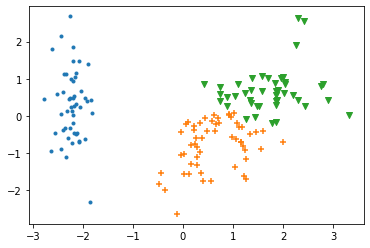

In [24]:
for i in np.arange(3):
    idx = (kmx == i)
    plt.scatter(pcx[idx, 0], pcx[idx, 1], marker=mk[i])
plt.show();

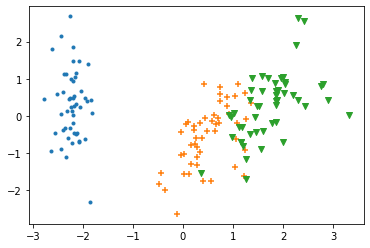

In [25]:
for i in np.arange(3):
    idx = (d.target == i)
    plt.scatter(pcx[idx, 0], pcx[idx, 1], marker=mk[i])
plt.show();

In [26]:
# スペクトラルクラスタリング
# グラフラプラシアンについて(https://qiita.com/silva0215/items/0d1d25ef51b6865a6e15)
from common import mlbench as ml

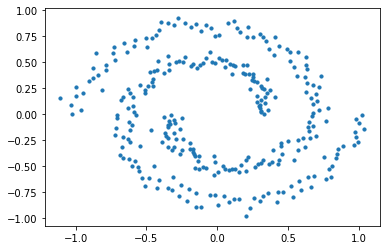

(300, 2) (300,)


In [34]:
x, y = ml.spirals(300, cycles=1, sd = 0.05)
plt.scatter(x[:, 0], x[:, 1], s= 10)
plt.show();
print(x.shape, y.shape)

In [45]:
# スペクトラルクラスタリングを適用
sc = cluster.SpectralClustering(n_clusters=2, gamma=300, n_init=100)

In [49]:
sc.fit(x)
cl = sc.labels_

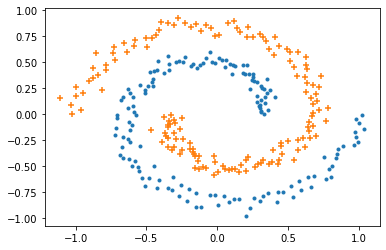

In [47]:
# プロット
plt.scatter(x[cl == 0, 0], x[cl == 0, 1], marker='.')
plt.scatter(x[cl == 1, 0], x[cl == 1, 1], marker='+')
plt.show();

In [50]:
# スペクトラルクラスタリングで使われている局所性保存射影
# 局所性保存射影と多次元尺度構成法

In [51]:
from sklearn.manifold import MDS

In [83]:
data = pd.read_csv('data/voting.csv').values
data.shape

(15, 16)

In [84]:
S, pidx = data[:, :15], data[:, 15] # 類似度
mk = ['x', '.']; col = ['red', 'blue'] # プロット設定

In [85]:
# 局所性保存射影
W = np.exp(-S/np.median(S)) # 重みに変換(15次行列)
W.shape

(15, 15)

In [86]:
# np.diag()の引数にnumpy.ndarrayを指定すると、対角成分が一次元配列として返される。
# また、引数に一次元配列を指定するとその配列を対角成分とした対角行列が生成される。
L = np.diag(np.sum(W, 1)) - W  # グラフラプラシアン
# np.sum(W, 1)は1次元配列なので、その成分を対角成分とした対角行列が生成される
# np.diag(np.sum(W, 1))

In [87]:
# 固有値、固有ベクトルの計算
# 小さい順にソートされた固有値が出力される
la, l = sp.linalg.eigh(L)
print(np.sort(la), la)
# 小さい固有値に対応する固有ベクトル
px = l[:, 1]; py = l[:, 2]

[1.24344979e-14 3.66735929e+00 4.15734063e+00 4.74609740e+00
 4.77970838e+00 5.13447404e+00 5.55919195e+00 5.86241286e+00
 6.35465321e+00 6.58271992e+00 6.74605869e+00 7.01357029e+00
 7.59588894e+00 7.99459004e+00 8.24128491e+00] [1.24344979e-14 3.66735929e+00 4.15734063e+00 4.74609740e+00
 4.77970838e+00 5.13447404e+00 5.55919195e+00 5.86241286e+00
 6.35465321e+00 6.58271992e+00 6.74605869e+00 7.01357029e+00
 7.59588894e+00 7.99459004e+00 8.24128491e+00]


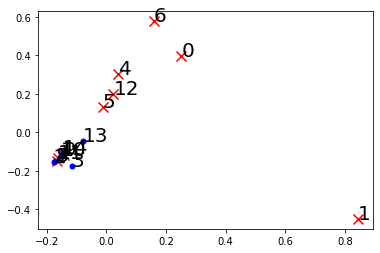

In [78]:
# 局所性保存射影の結果をプロット
for i in [0, 1]:
    plt.scatter(px[pidx == i], py[pidx == i], c = col[i], marker=mk[i], s = 100)

for i, (x, y) in enumerate(zip(px, py)):
    plt.annotate(str(i), (x, y), fontsize = 20)
plt.show();

In [88]:
# ここまではデータの分布に特別な過程をおかずにデータをクラスタリングする方法を行なってきた

In [89]:
# 次はデータがある確率分布に従うと仮定し、その知識を用いてクラスタリングを行う手法

In [90]:
# 混合正規分布によるクラスタリング
from sklearn.mixture import GaussianMixture

In [92]:
d = datasets.load_wine()
d.data.shape

(178, 13)

In [93]:
x, y = d.data, d.target
y.shape

(178,)

In [94]:
ncl = 3 # コンポーネント数3の混合正規分布(コンポーネントとは混合正規分布に含まれる1つ1つの正規分布のこと)

In [95]:
mg = GaussianMixture(ncl).fit(x)
cl = mg.predict(x)

In [98]:
pc = PCA(n_components=2)
pc.fit(x)
px = pc.transform(x) # 主成分スコア

In [99]:
mk = ['.', '+', 'v'] # クラスタリングの結果をプロット

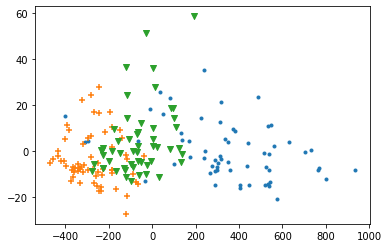

In [101]:
for i in np.arange(ncl):
    j = (cl == i)
    plt.scatter(px[j, 0], px[j, 1], marker = mk[i])
plt.show();

In [108]:
# BICを利用してグループ数をデータから自動的に選択する
bics = np.array([])
nc = np.arange(1, 101) # クラスタ数: 1から100

In [109]:
for k in nc:
    bics = np.r_[bics, GaussianMixture(k, n_init=10).fit(x).bic(x)]
nc[np.argmin(bics)]

25

(100,)


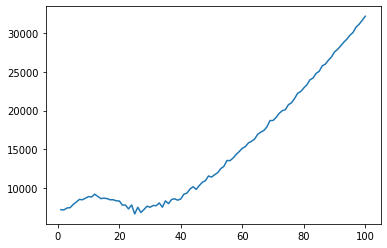

In [110]:
print(bics.shape)
plt.plot(nc, bics) # クラスタ数に対するBICの値をプロット
plt.show();